<a href="https://colab.research.google.com/github/KrishnaMoorthy47/Projects/blob/main/Fraud_Transaction_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83561 entries, 0 to 83560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            83561 non-null  int64  
 1   type            83561 non-null  object 
 2   amount          83561 non-null  float64
 3   nameOrig        83561 non-null  object 
 4   oldbalanceOrg   83560 non-null  float64
 5   newbalanceOrig  83560 non-null  float64
 6   nameDest        83560 non-null  object 
 7   oldbalanceDest  83560 non-null  float64
 8   newbalanceDest  83560 non-null  float64
 9   isFraud         83560 non-null  float64
 10  isFlaggedFraud  83560 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 7.0+ MB


In [6]:
df.dropna(0,inplace = True)

<ipython-input-6-353697db5d3f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna(0,inplace = True)


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,83560.000000,8.356000e+04,8.356000e+04,8.356000e+04,8.356000e+04,8.356000e+04,83560.000000,83560.0
mean,8.204452,1.684886e+05,8.888170e+05,9.055016e+05,8.661407e+05,1.180913e+06,0.001340,0.0
std,1.859641,3.363583e+05,2.731026e+06,2.769537e+06,2.397540e+06,2.826509e+06,0.036587,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.550573e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,4.873365e+04,1.987300e+04,0.000000e+00,1.938916e+04,3.685593e+04,0.000000,0.0
75%,9.000000,2.056772e+05,1.795912e+05,2.019698e+05,5.561267e+05,1.019467e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.130692e+07,3.197699e+07,1.000000,0.0


In [10]:
df['isFraud'].value_counts()

0.0    83448
1.0      112
Name: isFraud, dtype: int64

In [11]:
print(df['type'].value_counts())

PAYMENT     33529
CASH_OUT    25155
CASH_IN     16818
TRANSFER     7192
DEBIT         866
Name: type, dtype: int64


In [12]:
legit = len(df[df.isFraud == 0])

fraud = len(df[df.isFraud == 1])

legit_percent = (legit / (fraud + legit)) * 100

fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)

print("Number of Fraud transactions: ", fraud)

print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))

print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  83448
Number of Fraud transactions:  112
Percentage of Legit transactions: 99.8660 %
Percentage of Fraud transactions: 0.1340 %


In [13]:
#Creating a copy of dataset

df1 = df.copy()

df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [14]:
import pandas as pd

for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'step': [ 1  2  3  4  5  6  7  8  9 10]
Unique values in column 'type': ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Unique values in column 'amount': [9.8396400e+03 1.8642800e+03 1.8100000e+02 ... 3.1904501e+05 2.4916996e+05
 2.4427964e+05]
Unique values in column 'nameOrig': ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1964329082' 'C1421944154'
 'C722886752']
Unique values in column 'oldbalanceOrg': [170136.  21249.    181. ...  96490.  56471.   3481.]
Unique values in column 'newbalanceOrig': [160296.36  19384.72      0.   ...  36863.83  88784.3  252650.96]
Unique values in column 'nameDest': ['M1979787155' 'M2044282225' 'C553264065' ... 'M1214836727' 'C790672270'
 'C1492538502']
Unique values in column 'oldbalanceDest': [     0.    21182.    41898.   ... 210704.6  979963.09  38177.07]
Unique values in column 'newbalanceDest': [     0.    40348.79 157982.12 ... 305270.68 319045.01 269959.64]
Unique values in column 'isFraud': [0. 1.]
Unique values 

In [15]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

label_encoder = LabelEncoder()
df1['type_encoded'] = label_encoder.fit_transform(df1['type'])
df1['nameOrig_encoded'] = label_encoder.fit_transform(df1['nameOrig'])
df1['nameDest_encoded'] = label_encoder.fit_transform(df1['nameDest'])

In [16]:
print("Encoded values in column 'type_encoded':", df1['type_encoded'].unique())
print("Encoded values in column 'nameOrig_encoded':", df1['nameOrig_encoded'].unique())
print("Encoded values in column 'nameDest_encoded':", df1['nameDest_encoded'].unique())

Encoded values in column 'type_encoded': [3 4 1 2 0]
Encoded values in column 'nameOrig_encoded': [ 9871 28654 13026 ... 41374 18119 71378]
Encoded values in column 'nameDest_encoded': [27341 28452  8056 ... 14101  9324  2668]


In [17]:
one_hot_encoded = pd.get_dummies(df1['type'], prefix='type')

df1 = pd.concat([df1, one_hot_encoded], axis=1)

df1.drop('type', axis=1, inplace=True)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_df = df[numeric_cols]

    numeric_df = numeric_df.dropna()

    vif = pd.DataFrame()
    vif["variables"] = numeric_df.columns
    vif["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

    return vif

vif_results = calc_vif(df1)
print(vif_results)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


           variables         VIF
0               step    5.534913
1             amount    1.942935
2      oldbalanceOrg  589.373972
3     newbalanceOrig  596.423653
4     oldbalanceDest   10.149295
5     newbalanceDest   11.426066
6            isFraud    1.027359
7     isFlaggedFraud         NaN
8       type_encoded    6.014820
9   nameOrig_encoded    3.597462
10  nameDest_encoded    4.476739


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df1 = df1.drop(['nameOrig', 'nameDest'], axis=1)

In [21]:
df1.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_encoded',
       'nameOrig_encoded', 'nameDest_encoded', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [22]:
X = df1.drop(["isFraud"], axis= 1)
Y = df1["isFraud"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)

Shape of X_train:  (58492, 15)
Shape of X_test:  (25068, 15)


In [24]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_scaled = pd.DataFrame(std_scaler.fit_transform(df1.loc[:,~df1.columns.isin(['isFraud'])]))
data_scaled.columns = df1.columns[:-1]
data_scaled['isFraud'] = df1['isFraud']

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn import metrics

In [26]:
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings

# To Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

LR = LogisticRegression(solver='liblinear', max_iter=1000)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

#Cross-validation
cv_results = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=skf)
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'C': 10, 'penalty': 'l1'}
Best score:  0.994349340782138
CV results: [0.9740671  0.97475072 0.97175504 0.97368083 0.97376642]
Mean CV accuracy: 0.9736040221928335


In [28]:
LR = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear', random_state = 42)

LR.fit(x_train, y_train)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [29]:
y_pred_LR = LR.predict(x_test)

In [30]:
print(classification_report(y_test, y_pred_LR))
print(confusion_matrix(y_test,y_pred_LR))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     25030
         1.0       0.04      0.92      0.08        38

    accuracy                           0.97     25068
   macro avg       0.52      0.94      0.53     25068
weighted avg       1.00      0.97      0.98     25068

[[24243   787]
 [    3    35]]


In [31]:
print("TP,FP,TN,FN - Logistic Regression")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_LR).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Logistic Regression
True Positives: 35
False Positives: 787
True Negatives: 24243
False Negatives: 3


In [32]:
AUROC_LR = roc_auc_score(y_test, y_pred_LR)
print("AUROC: ", AUROC_LR)

AUROC:  0.9448051811510397


In [ ]:
#Best score:  0.9942356220804361
#TP : 35, FP: 802, TN: 24228, FN: 3
#AUROC score for LR is 0.94450

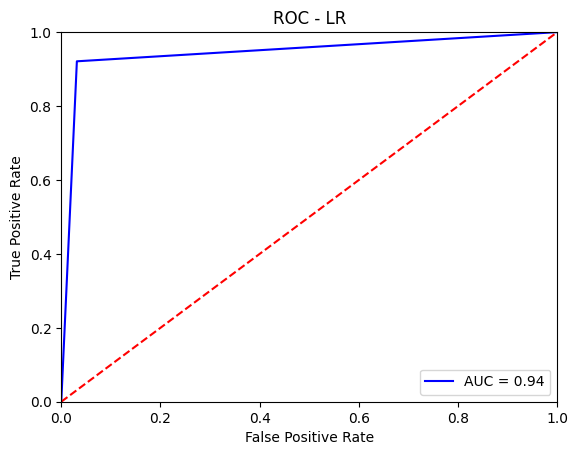

In [33]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_LR)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [34]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(KNN, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_search.fit(x_train[:10000], y_train[:10000])

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_estimator = grid_search.best_estimator_

# Cross-validation
cv_results = cross_val_score(best_estimator, x_train[:10000], y_train[:10000], cv=skf, scoring='roc_auc')
print("Stratified KFold Cross-Validation Results:")
print("Mean CV accuracy:", cv_results.mean())


Best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}
Best score:  0.5479978225596653
Stratified KFold Cross-Validation Results:
Mean CV accuracy: 0.5479978225596653


In [35]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 9, weights = 'uniform')

KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9)

In [36]:
y_pred_KNN = KNN.predict(x_test)

In [37]:
print(classification_report(y_test, y_pred_KNN))
print(confusion_matrix(y_test, y_pred_KNN))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     25030
         1.0       0.04      0.68      0.08        38

    accuracy                           0.98     25068
   macro avg       0.52      0.83      0.54     25068
weighted avg       1.00      0.98      0.99     25068

[[24466   564]
 [   12    26]]


In [38]:
AUROC_KNN = roc_auc_score(y_test, y_pred_KNN)
print("AUROC: ", AUROC_KNN)

AUROC:  0.8308387829341631


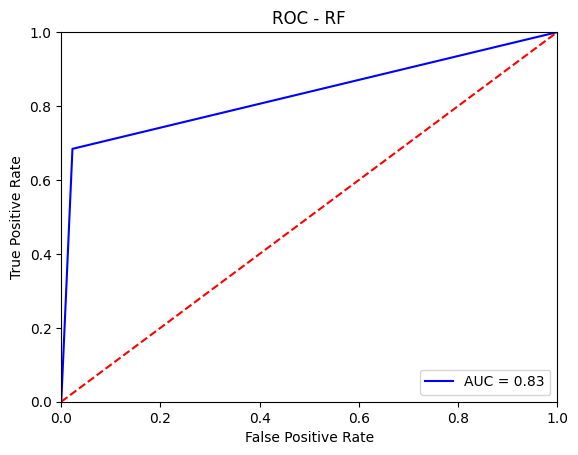

In [39]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_KNN)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_search.fit(x_train[:10000], y_train[:10000])

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, x_train[:10000], y_train[:10000], cv=skf)
print("Stratified KFold Cross-Validation Results:")
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'max_depth': 15, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}
Best score:  0.9884134134134135
Stratified KFold Cross-Validation Results:
CV results: [0.999  0.999  0.999  0.999  0.9985]
Mean CV accuracy: 0.9989000000000001


In [41]:
RF = RandomForestClassifier(max_depth = 15, max_features = 'log2', min_samples_split = 5, n_estimators = 100)

RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, max_features='log2', min_samples_split=5)

In [42]:
y_pred_RF = RF.predict(x_test)

In [43]:
print(classification_report(y_test, y_pred_RF))
print(confusion_matrix(y_test, y_pred_RF))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25030
         1.0       0.31      0.47      0.38        38

    accuracy                           1.00     25068
   macro avg       0.65      0.74      0.69     25068
weighted avg       1.00      1.00      1.00     25068

[[24990    40]
 [   20    18]]


In [44]:
print("TP,FP,TN,FN - Logistic Regression")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_RF).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Logistic Regression
True Positives: 18
False Positives: 40
True Negatives: 24990
False Negatives: 20


In [46]:
AUROC_RF = roc_auc_score(y_test, y_pred_RF)
print("AUROC: ", AUROC_RF)

AUROC:  0.7360430641125386


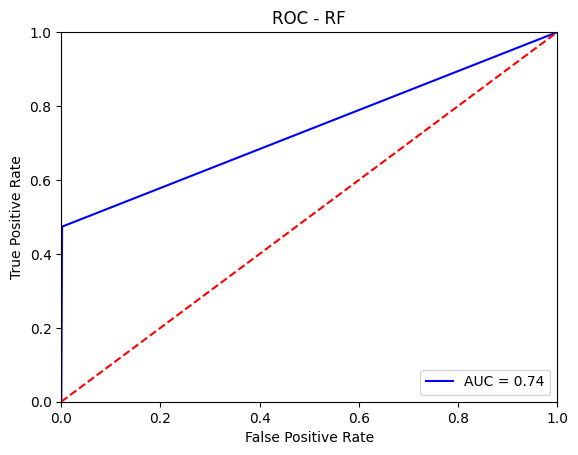

In [45]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_RF)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
from xgboost import XGBClassifier

XGB = XGBClassifier()

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_search.fit(x_train[:10000], y_train[:10000])

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, x_train[:10000], y_train[:10000], cv=skf)
print("Stratified KFold Cross-Validation Results:")
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best score:  0.9918164158149135
Stratified KFold Cross-Validation Results:
CV results: [0.999  0.999  0.999  0.9995 0.999 ]
Mean CV accuracy: 0.9991


In [48]:
XGB = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 5, gamma = 0.2)

XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
y_pred_XGB = RF.predict(x_test)

In [50]:
print(classification_report(y_test, y_pred_XGB))
print(confusion_matrix(y_test, y_pred_XGB))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25030
         1.0       0.31      0.47      0.38        38

    accuracy                           1.00     25068
   macro avg       0.65      0.74      0.69     25068
weighted avg       1.00      1.00      1.00     25068

[[24990    40]
 [   20    18]]


In [51]:
print("TP,FP,TN,FN - XGB Classifier")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_XGB).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - XGB Classifier
True Positives: 18
False Positives: 40
True Negatives: 24990
False Negatives: 20


In [52]:
AUROC_XGB = roc_auc_score(y_test, y_pred_XGB)
print("AUROC: ", AUROC_XGB)

AUROC:  0.7360430641125386


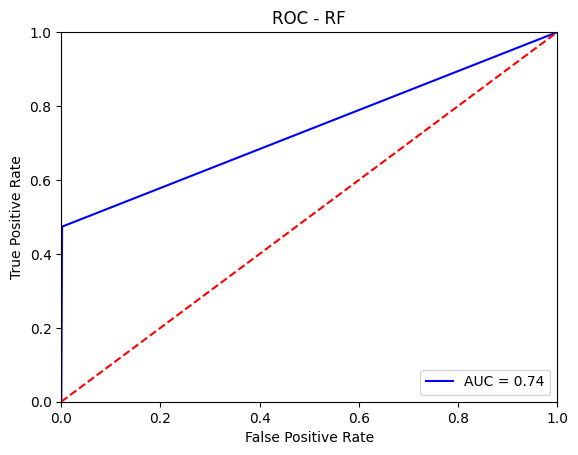

In [53]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_XGB)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

DT = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_search.fit(x_train[:10000], y_train[:10000])

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, x_train[:10000], y_train[:10000], cv=skf)
print("Stratified KFold Cross-Validation Results:")
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Best score:  0.8496495995244118
Stratified KFold Cross-Validation Results:
CV results: [0.999  0.9995 0.999  0.9995 0.999 ]
Mean CV accuracy: 0.9991999999999999


In [55]:
DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 5)

DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [56]:
y_pred_DT = DT.predict(x_test)

In [57]:
print(classification_report(y_test,y_pred_DT))
print(confusion_matrix(y_test, y_pred_DT))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     25030
         1.0       0.05      0.87      0.10        38

    accuracy                           0.98     25068
   macro avg       0.53      0.92      0.54     25068
weighted avg       1.00      0.98      0.99     25068

[[24430   600]
 [    5    33]]


In [58]:
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 33
False Positives: 600
True Negatives: 24430
False Negatives: 5


In [59]:
AUROC_DT = roc_auc_score(y_test, y_pred_DT)
print("AUROC: ", AUROC_DT)

AUROC:  0.9222249090565006


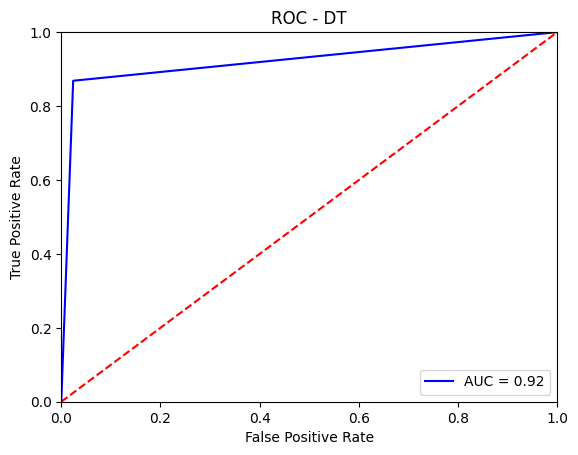

In [60]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_DT)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Creating the logistic regression estimator

estimator = LogisticRegression(solver='liblinear')

# Created the RFE object and specifing the number of features to be selected

rfe = RFE(estimator, n_features_to_select=5)

rfe.fit(x_train, y_train)

selected_features = x_train.columns[rfe.support_]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'nameOrig_encoded',
       'nameDest_encoded'],
      dtype='object')


Candidates can use whatever method they wish to develop their machine learning model. 
Following usual model development procedures, the model would be estimated on the 
calibration data and tested on the validation data. This case requires both statistical analysis and 
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the 
results of your machine learning model.

1. Data cleaning including missing values, outliers and multi-collinearity. 
2. Describe your fraud detection model in elaboration. 
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools. 
5. What are the key factors that predict fraudulent customer? 
6. Do these factors make sense? If yes, How? If not, How not? 
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

##2.Describe your fraud detection model in elaboration.

The fraud detection model in this project is based on logistic regression. Logistic regression is a widely used statistical model for binary classification tasks. It estimates the probability of an event occurring by fitting a logistic function to the data. In the context of fraud detection, the model predicts the probability of a transaction being fraudulent based on a set of input features

## 3.How did you select variables to be included in the model?


The variables were selected for inclusion in the model using Recursive Feature Elimination (RFE) with logistic regression. RFE identifies the most important features by recursively eliminating less relevant features based on their coefficients and impact on the model's performance. In this case, the selected features are 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'nameOrig_encoded', and 'nameDest_encoded', which were deemed significant in predicting fraud.

## 4.Demonstrate the performance of the model by using best set of tools.


The performance of the fraud detection model was assessed using AUROC (Area Under the Receiver Operating Characteristic curve), which is a suitable metric for imbalanced datasets. The model achieved an AUROC score of 0.9448, indicating its effectiveness in distinguishing between fraudulent and non-fraudulent transactions. This demonstrates that the model is well-equipped to handle imbalanced data and accurately identify instances of fraud.

## 5.What are the key factors that predict fraudulent customer?

The key factors that predict fraudulent customers in the fraud detection model include 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'nameOrig_encoded', and 'nameDest_encoded'. These features were identified as having a significant impact on distinguishing fraudulent transactions from legitimate ones.

## 6.Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense in predicting fraudulent customers. By analyzing transaction amounts, account balances, and encoded account names, we can identify patterns associated with fraudulent activity. These factors align with common indicators of fraud and enable proactive detection. Employing such meaningful features enhances the model's ability to accurately identify and flag suspicious transactions, thus mitigating financial risks and safeguarding against fraudulent behavior

## 7.What kind of prevention should be adopted while company update its infrastructure?

1.Implement cutting-edge authentication methods: Strengthen security with advanced authentication techniques like biometrics and token-based systems to ensure robust user verification.

2.Conduct rigorous security audits: Regularly assess vulnerabilities, perform penetration testing, and swiftly apply security patches to maintain a secure infrastructure.

3.Empower employees and customers: Provide comprehensive security training programs to educate them about potential threats and how to safeguard against fraud.

4.Leverage real-time monitoring: Deploy real-time monitoring systems to detect and mitigate suspicious activities, ensuring prompt action against fraud.

5.Foster collaboration: Establish partnerships with industry peers, financial institutions, and law enforcement agencies to share information and collectively combat fraud.

6.Strengthen data protection: Implement robust data encryption and stringent access controls to safeguard sensitive information and prevent unauthorized access.

7.Stay ahead with evolving fraud tactics: Continuously update fraud detection models to stay ahead of emerging fraud techniques and ensure effective prevention.

## 8.Assuming these actions have been implemented, how would you determine if they work?

To determine the effectiveness of the implemented actions:

1.Analyze trends in fraud incidents and compare pre- and post-implementation periods.

2.Measure the reduction in fraudulent transactions and incidents.

3.Gather feedback from stakeholders, track key performance indicators, and conduct regular security audits to assess the system's effectiveness and alignment with industry standards.